This notebook is just for the curious, to see how the two libraries compare.  `pyndamics3` is a wrapper around `odeint` and has some functionality that `odeint` does not have and (I believe) is a little easier.  To show some of this, I am implementing the models found on this page:

https://www.geeksforgeeks.org/solve-differential-equations-with-odeint-function-of-scipy-module-in-python/

in both.

In [1]:
%matplotlib inline
from pylab import *
from scipy.integrate import odeint
from pyndamics3 import Simulation

pyndamics3  version  0.0.31


# Model 1

$$
\frac{dy}{dt} = -y t + 13
$$

## odeint

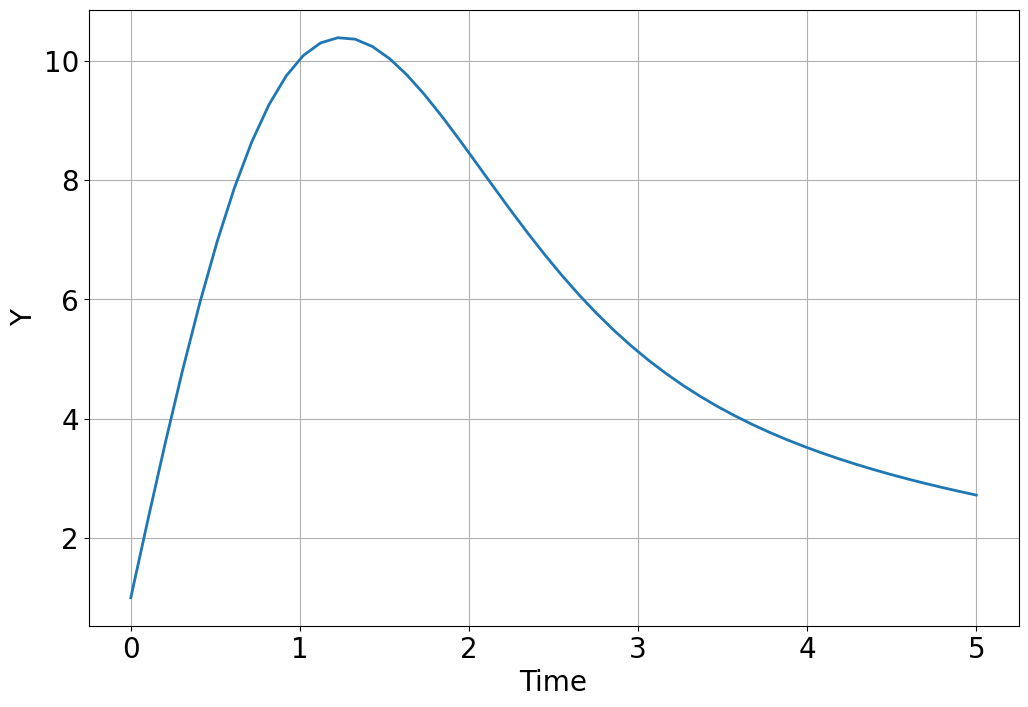

In [2]:
def returns_dydt(y,t): 
    dydt = -y * t + 13
    return dydt 
  
# initial condition 
y0 = 1
  
# values of time 
t = linspace(0,5) 
  
# solving ODE 
y = odeint(returns_dydt, y0, t) 
  
# plot results 
plot(t,y) 
xlabel("Time") 
ylabel("Y") 
show()

## pyndamics3

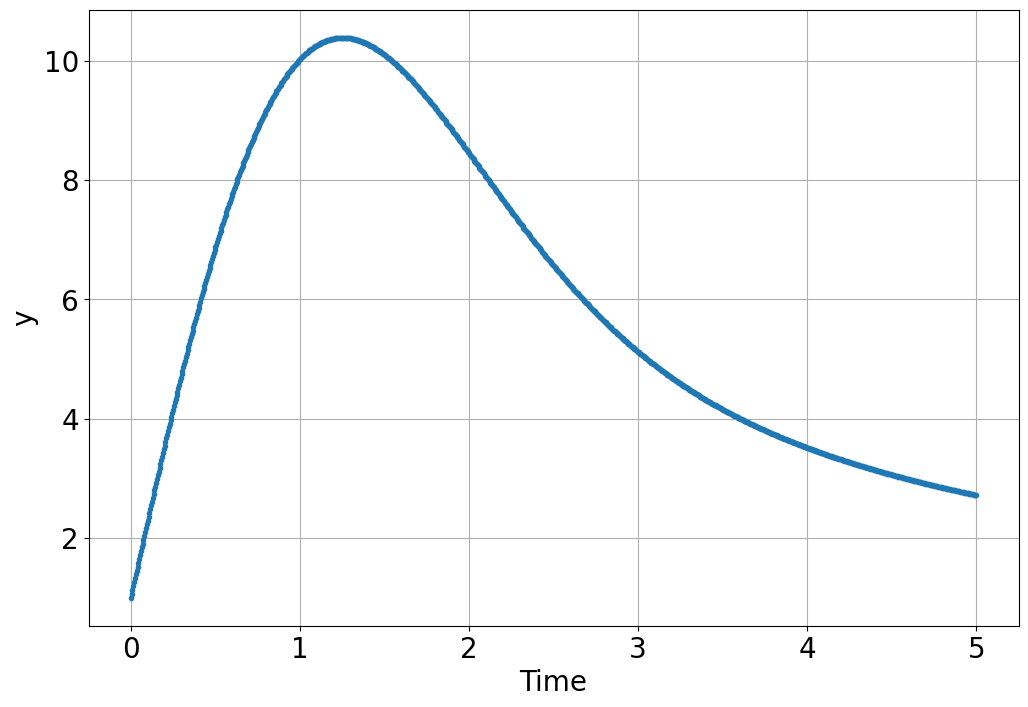

<Figure size 1200x800 with 0 Axes>

In [3]:
sim=Simulation()
sim.add("y' = -y*t + 13",initial_value=1,plot=True)
sim.run(5)

# Model 3

$$
\frac{dy}{dt} = \frac{1-y}{1.95-y} - \frac{y}{0.05+y}
$$


## odeint

Text(0, 0.5, 'Y')

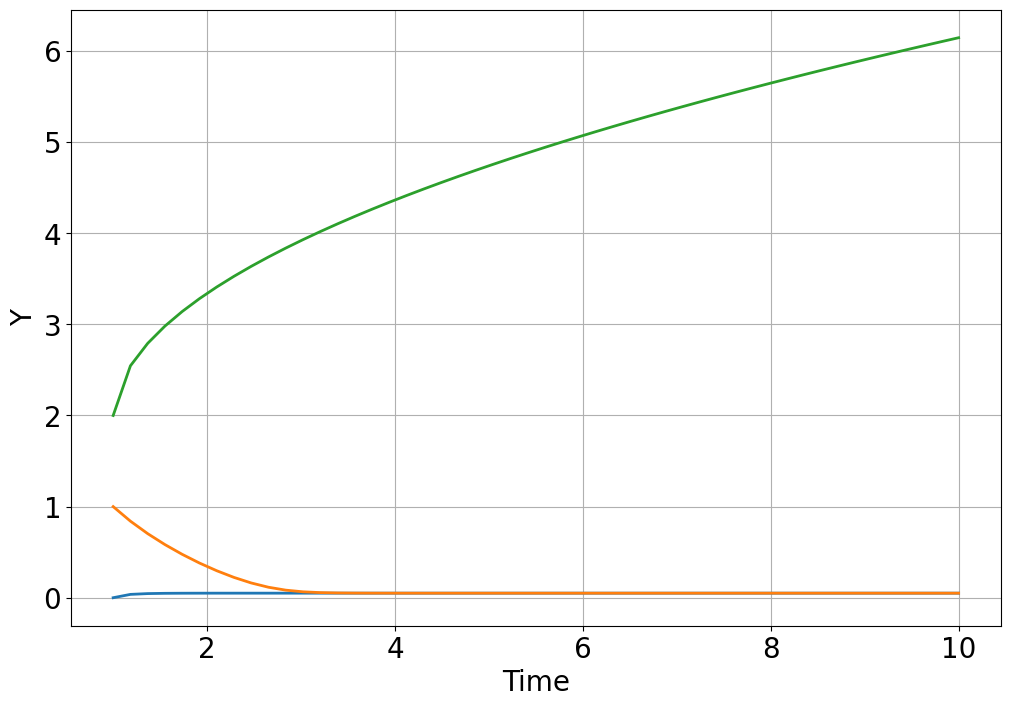

In [4]:
def returns_dydt(y,t): 
    dydt = (1-y)/(1.95-y) - y/(0.05+y) 
    return dydt 

# initial conditions 
y0 = [0, 1, 2] 

# values of time 
t = linspace(1,10) 

# solving ODE 
y = odeint(returns_dydt, y0, t) 

# plot results 
plot(t,y) 
xlabel("Time") 
ylabel("Y") 


Text(0, 0.5, 'Y')

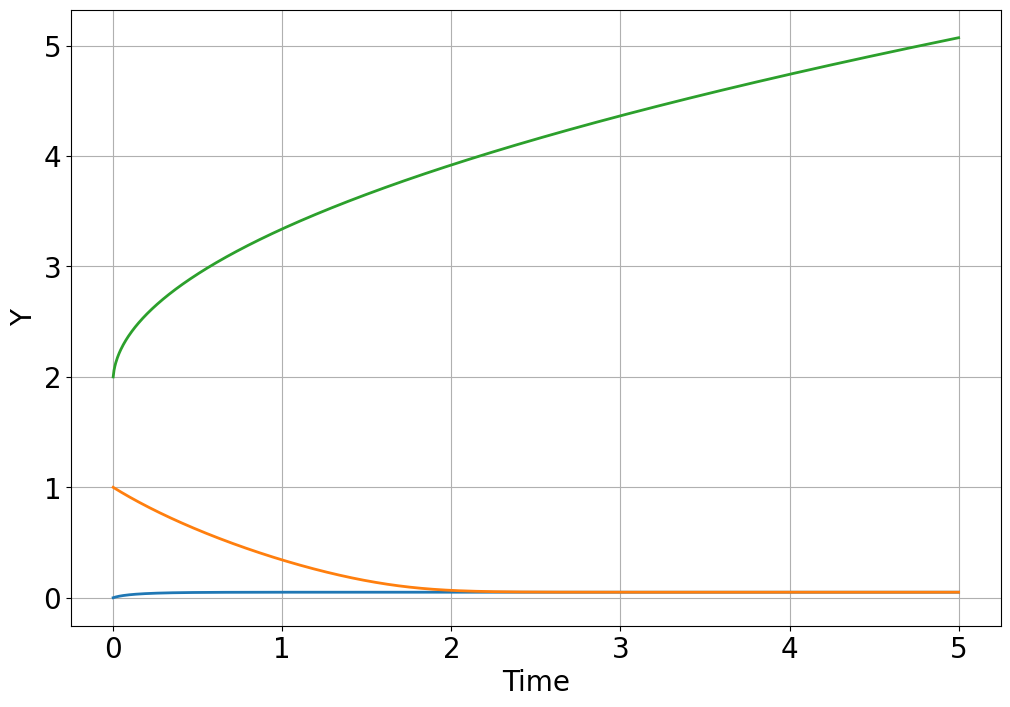

In [6]:
for y0 in [0,1,2]:
    sim=Simulation()
    sim.add("y' = (1-y)/(1.95-y) - y/(0.05+y) ",initial_value=y0,plot=False)
    sim.run(5)
    
    plot(sim.t,sim.y) 
    
    
xlabel("Time") 
ylabel("Y")     

## Model 4

From https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations

$$
\frac{dy}{dt} = -k*y
$$


## odeint

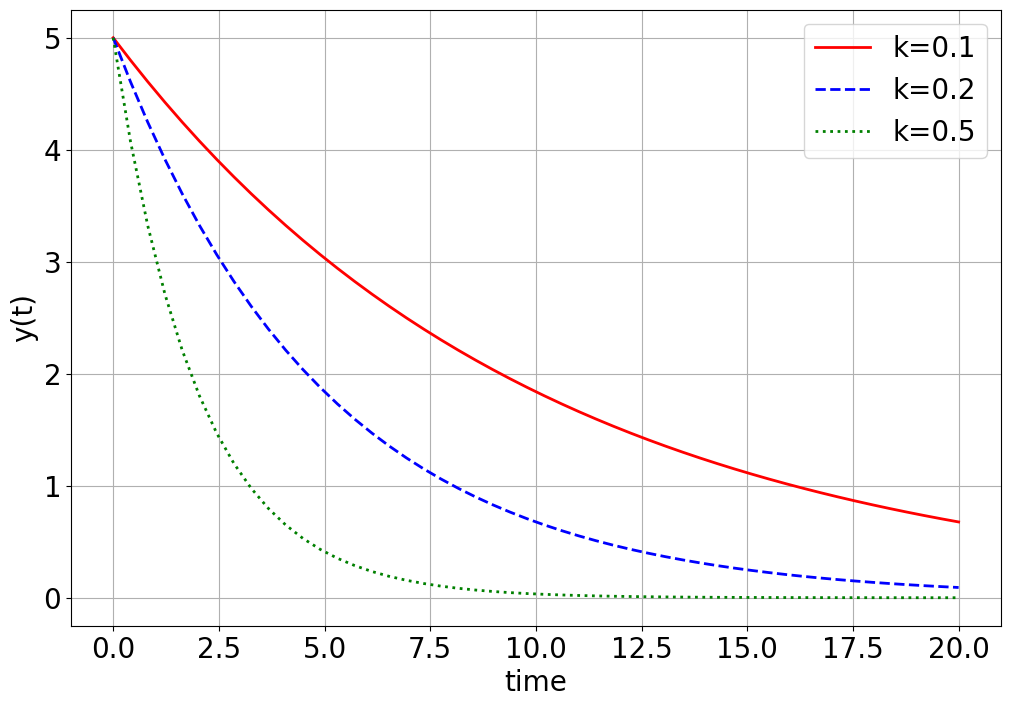

In [7]:
def model(y,t,k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = linspace(0,20)

# solve ODEs
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plot results
plot(t,y1,'r-',linewidth=2,label='k=0.1')
plot(t,y2,'b--',linewidth=2,label='k=0.2')
plot(t,y3,'g:',linewidth=2,label='k=0.5')
xlabel('time')
ylabel('y(t)')
legend()



## pyndamics3

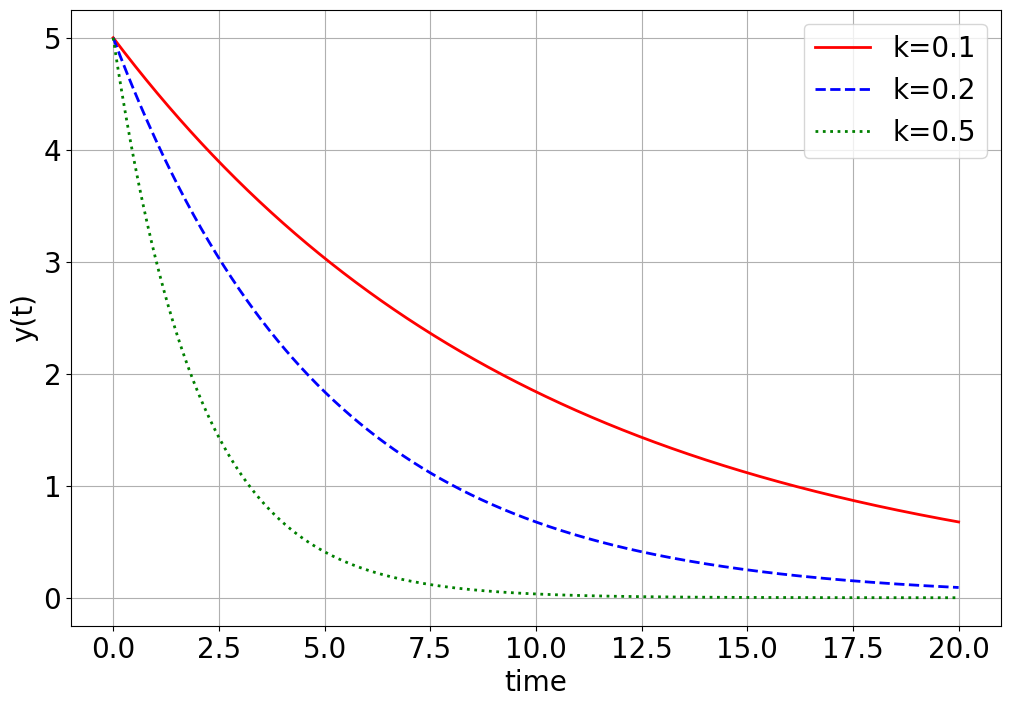

In [9]:
for linestyle,k in [('r-',.1),('b--',.2),('g:',.5)]:
    sim=Simulation()
    sim.add("y' = -k * y",initial_value=5)
    sim.params(k=k)
    sim.run(20)

    plot(sim.t,sim.y,linestyle,linewidth=2,label=f'k={sim.k}')



xlabel('time')
ylabel('y(t)')
legend()


...or...

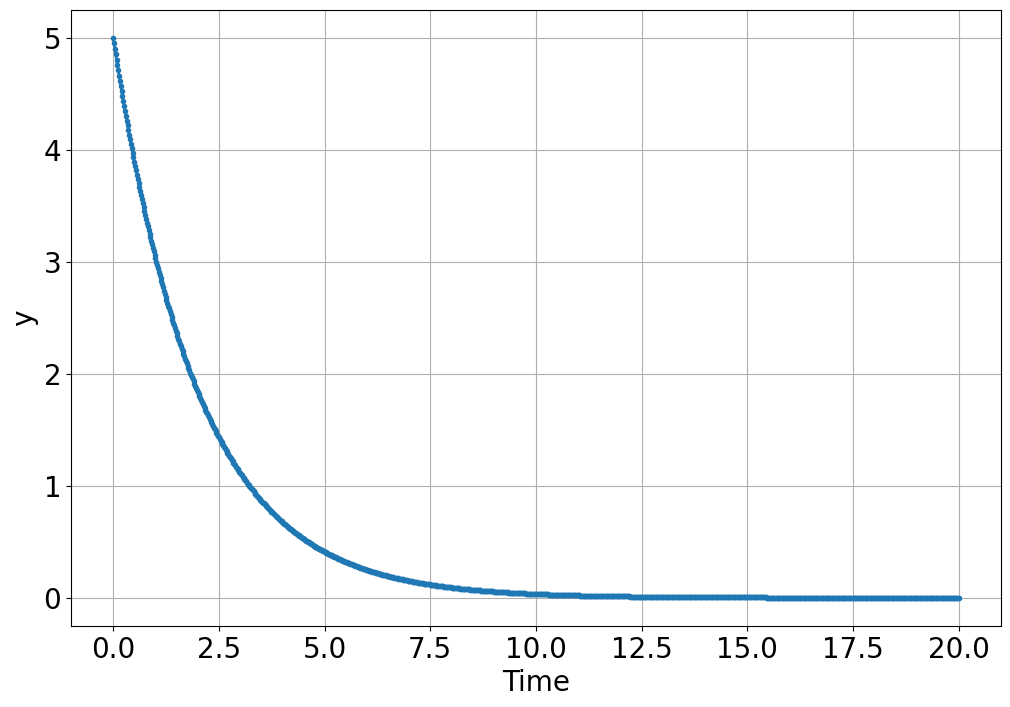

<Figure size 1200x800 with 0 Axes>

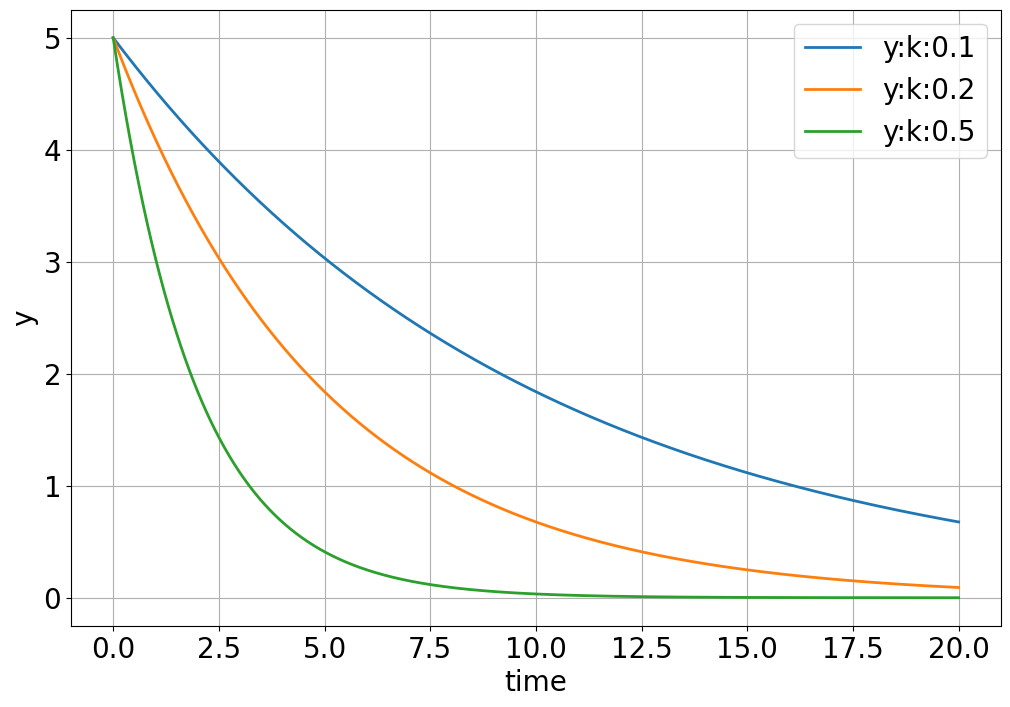

In [12]:
sim=Simulation()
sim.add("y' = -k * y",initial_value=5,plot=True)
sim.params(k=k)
sim.run(20)

from pyndamics3 import explore_parameters
explore_parameters(sim,k=[0.1,0.2,0.5])

# SIR Model 

https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

## odeint

Text(0, 0.5, 'Number (1000s)')

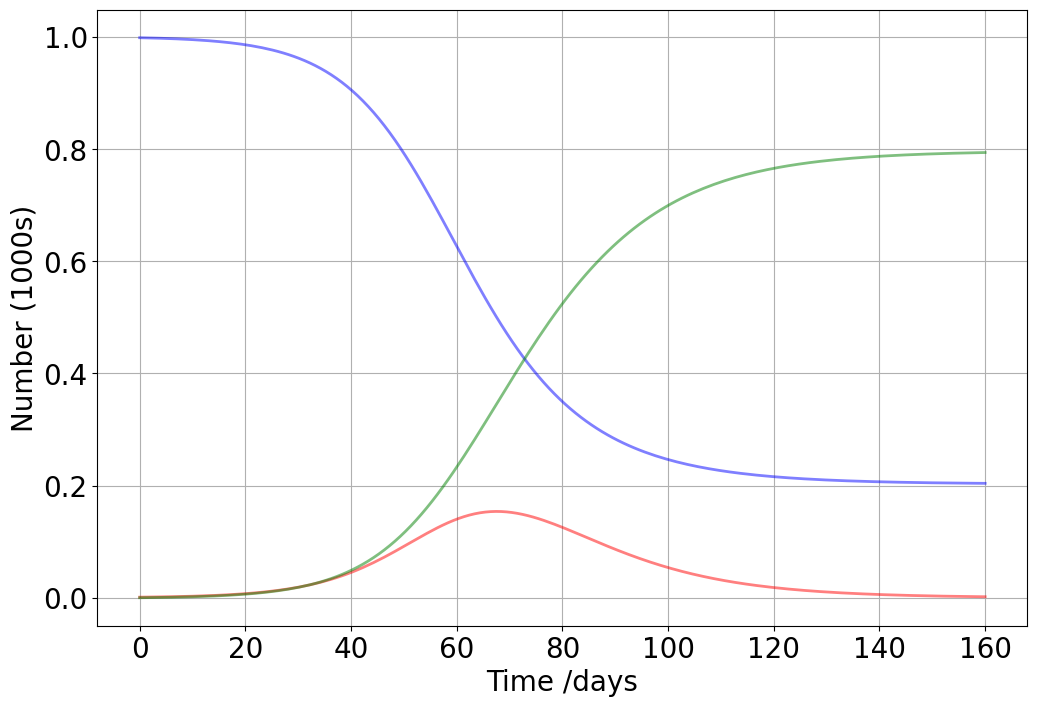

In [13]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
xlabel('Time /days')
ylabel('Number (1000s)')


## pyndamics3

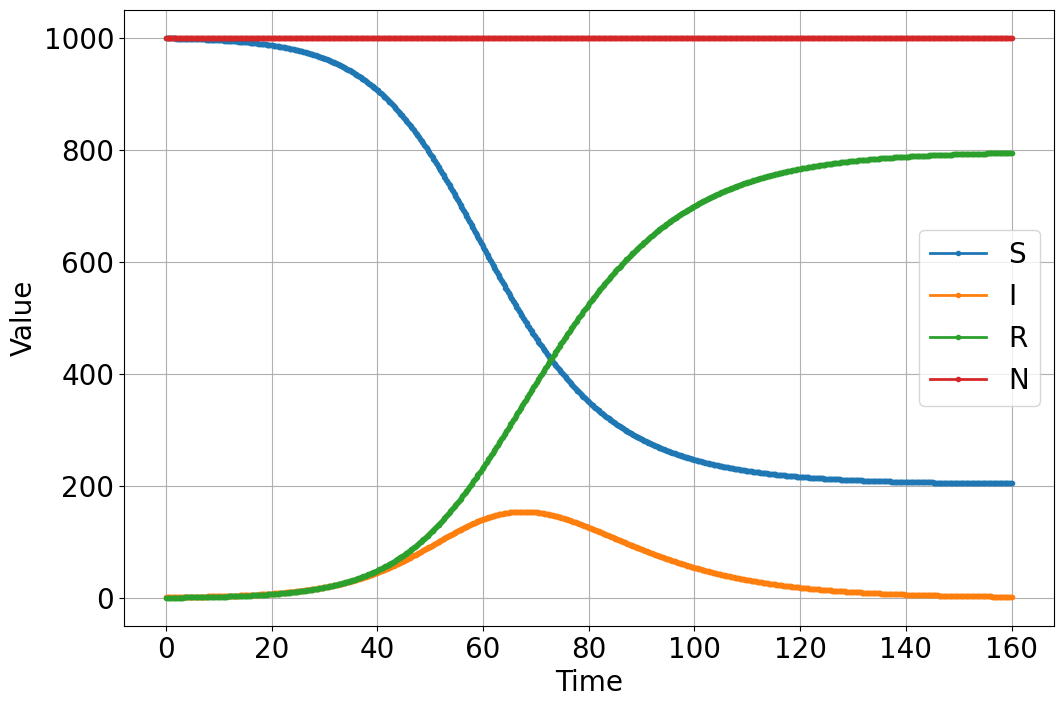

<Figure size 1200x800 with 0 Axes>

In [14]:
sim=Simulation()
sim.add("S' = -beta * S * I / N", 999,plot=1)
sim.add("I' = beta * S * I / N - gamma * I", 1,plot=1)
sim.add("R' = gamma * I",0,plot=1)
sim.add("N = S + I + R",plot=1)
sim.params(beta=0.2,gamma=1/10)
sim.run(160)
